In [1]:
# Load required packages
library(alakazam)
library(dowser)
library(airr)
library(dplyr)

# read the database
db <- read_airr("/home/phil/processed_docker/r_docker/changeo_10x/r_filtered_contig_heavy_germ-pass.tsv")
glimpse(db)

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 


Attaching package: ‘dowser’


The following objects are masked from ‘package:alakazam’:

    ExampleDb, ExampleTrees



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 885
Columns: 62
$ sequence_id               <chr> "GTCTCGTTCGTAGGTT-1_contig_1", "ATAGACCGTGT…
$ sequence                  <chr> "GAGCATAAGATCACTGTTCTCTCTACAGTTACTAAGCACACA…
$ rev_comp                  <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ productive                <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, T…
$ v_call                    <chr> "IGHV1-53*01", "IGHV1-53*01", "IGHV2-2*01",…
$ d_call                    <chr> "IGHD2-4*01,IGHD2-9*02", "IGHD1-1*01", NA, …
$ j_call                    <chr> "IGHJ2*01", "IGHJ2*01", "IGHJ4*01", "IGHJ4*…
$ sequence_alignment        <chr> "CAGGTCCAACTGCAGCAGCCTGGGACT...GAACTGGTGAAG…
$ germline_alignment        <chr> "CAGGTCCAACTGCAGCAGCCTGGGACT...GAACTGGTGAAG…
$ junction                  <chr> "TGTGCAAGATCGAATGATTACGACGGGGAGGGTTTTGACTAC…
$ junction_aa               <chr> "CARSNDYDGEGFDYW", "CARPPYYGSSYVGYW", "CARH…
$ v_cigar                   <chr> "109S294=", "109S294=", "109S291=", "110S29…
$ d_cigar                   <c

In [16]:
clones <- formatClones(
db,
seq = "sequence_alignment",
clone = "clone_id",
subclone = "subclone_id",
nproc = 16,
chain = "H",
heavy = "IGH",
trait = c("c_call", "sequence_id"),
cell = "cell_id",
locus = "locus",
minseq = 2,
split_light = FALSE,
majoronly = FALSE,
columns = NULL,
)

print(clones)

# A tibble: 32 x 4
   clone_id data       locus  seqs
   <chr>    <list>     <chr> <int>
 1 202_20   <airrClon> IGH      25
 2 598_57   <airrClon> IGH      25
 3 606_65   <airrClon> IGH       7
 4 174_343  <airrClon> IGH       6
 5 330_19   <airrClon> IGH       6
 6 732_210  <airrClon> IGH       6
 7 273_16   <airrClon> IGH       5
 8 263_112  <airrClon> IGH       4
 9 20_154   <airrClon> IGH       3
10 215_586  <airrClon> IGH       3
# … with 22 more rows


In [18]:
# Build maxmimum parsimony trees for first four clones using 
# phangorn package in R
trees <- getTrees(clones)

# simple tree plotting with ggtree R package with isotypes at tips
r_plot <- plotTrees(trees, nodes = FALSE, tips="c_call", tipsize = 2, node_palette = "Dark2", title = TRUE)

In [19]:
treesToPDF(r_plot, "r_plots.pdf", width = 5, height = 6)

png 
  2

In [20]:
# simple tree plotting with ggtree R package with isotypes at tips
scaleBranches(trees, edge_type = "mutations")

clone_id data                                                    locus seqs
1  202_20   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   25  
2  598_57   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   25  
3  606_65   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    7  
4  174_343  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    6  
5  330_19   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    6  
6  732_210  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    6  
7  273_16   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    5  
8  263_112  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    4  
9  20_154   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    3  
10 215_586  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    3  
11 251_31   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    3  
12 396_280  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    3  
13 695_370  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    3  
14 700_138  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    3  
15 714_564  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    3  
16 716_403  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    3  
17 102_276  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
18 189_570  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
19 221_6    <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
20 23_28    <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
21 235_115  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
22 250_526  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
23 255_469  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
24 350_25   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
25 382_95   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
26 413_241  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
27 426_530  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
28 446_243  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
29 465_128  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
30 488_194  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
31 49_168   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
32 84_3     <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
   trees                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

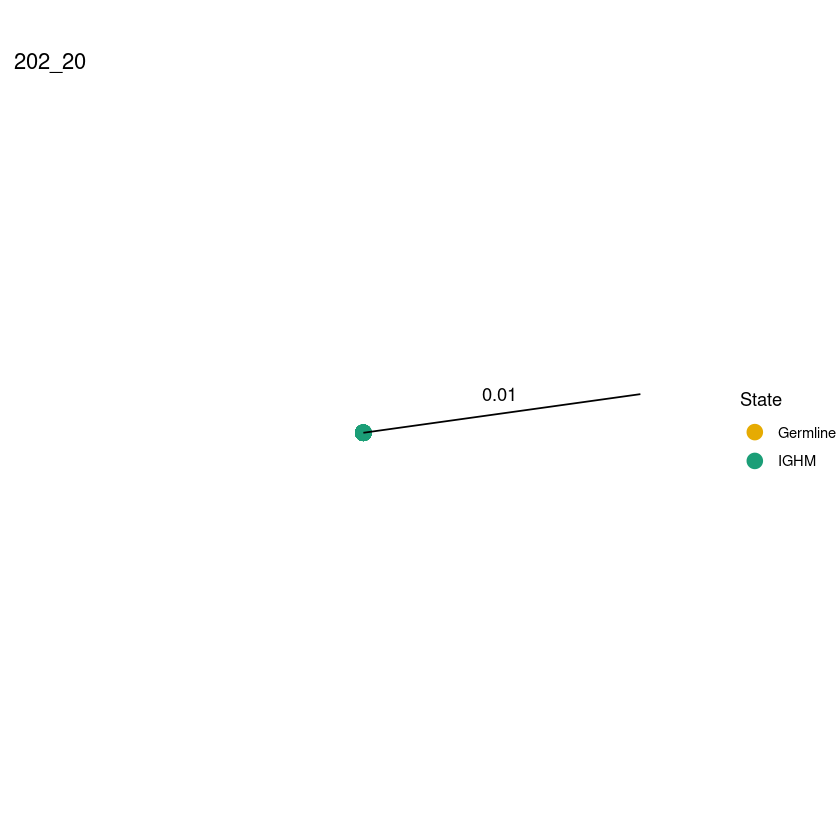

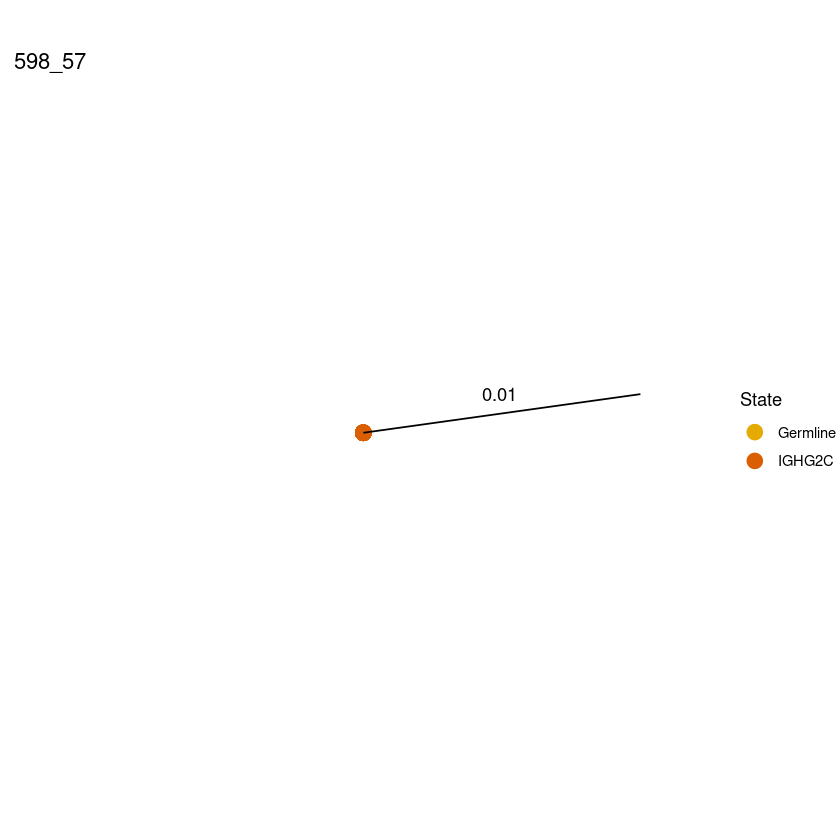

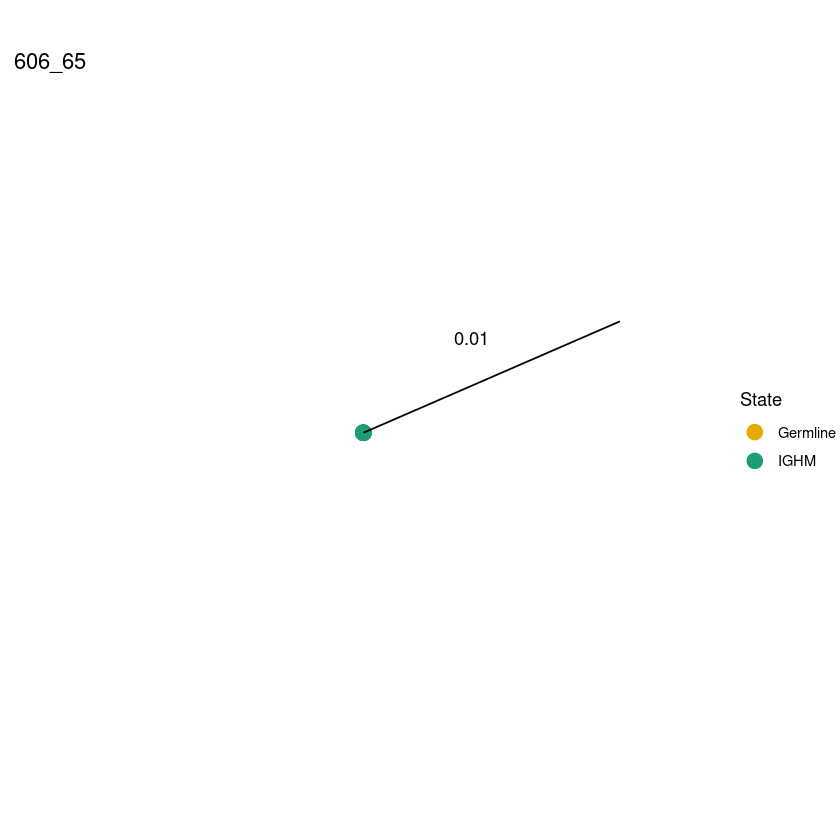

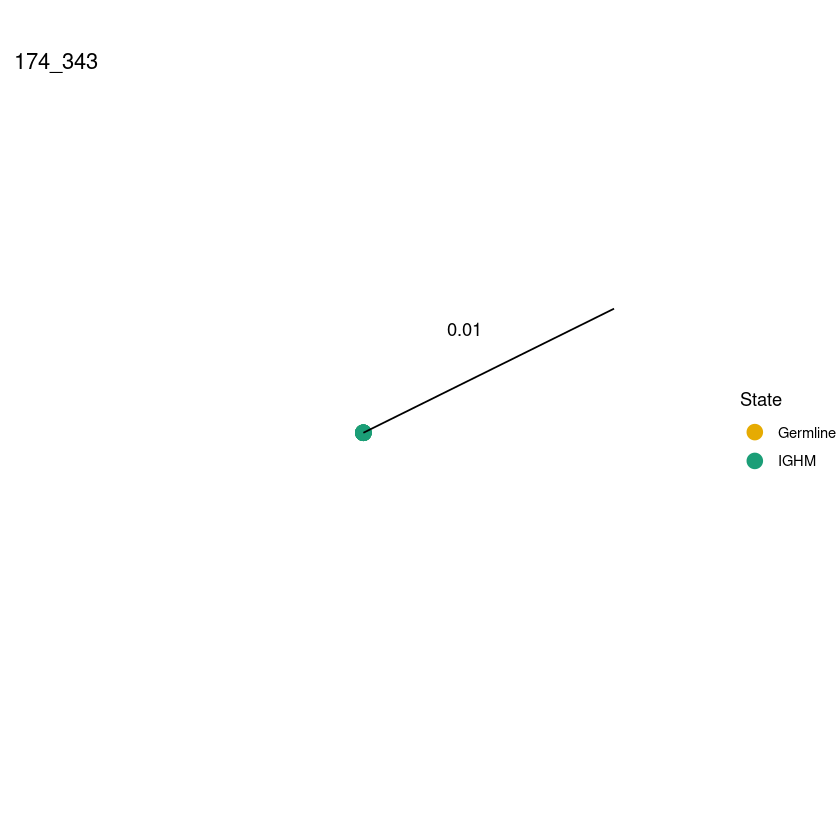

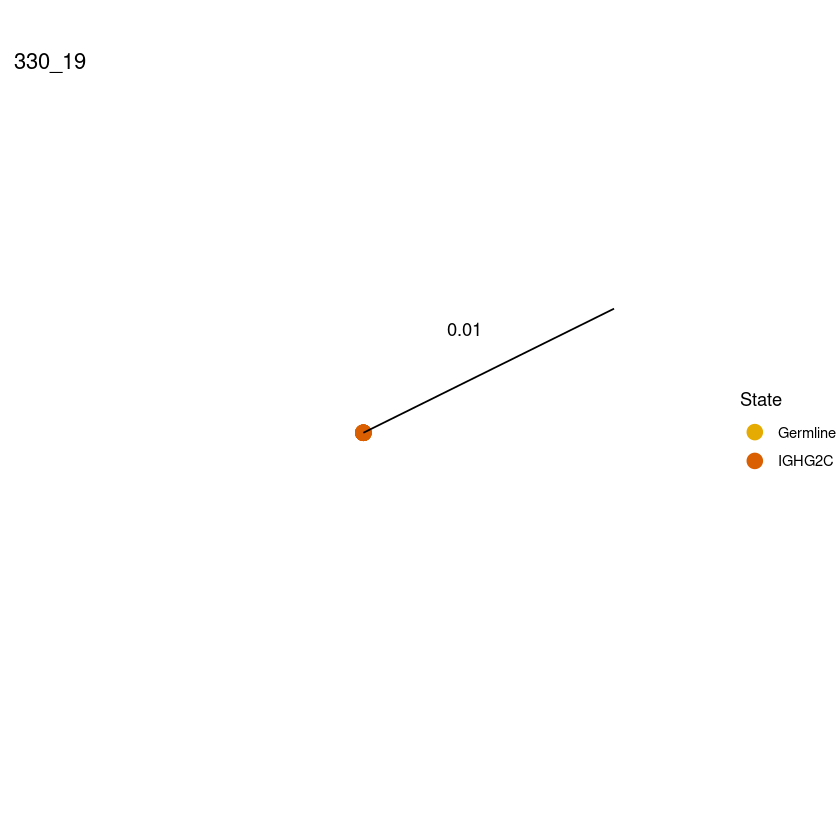

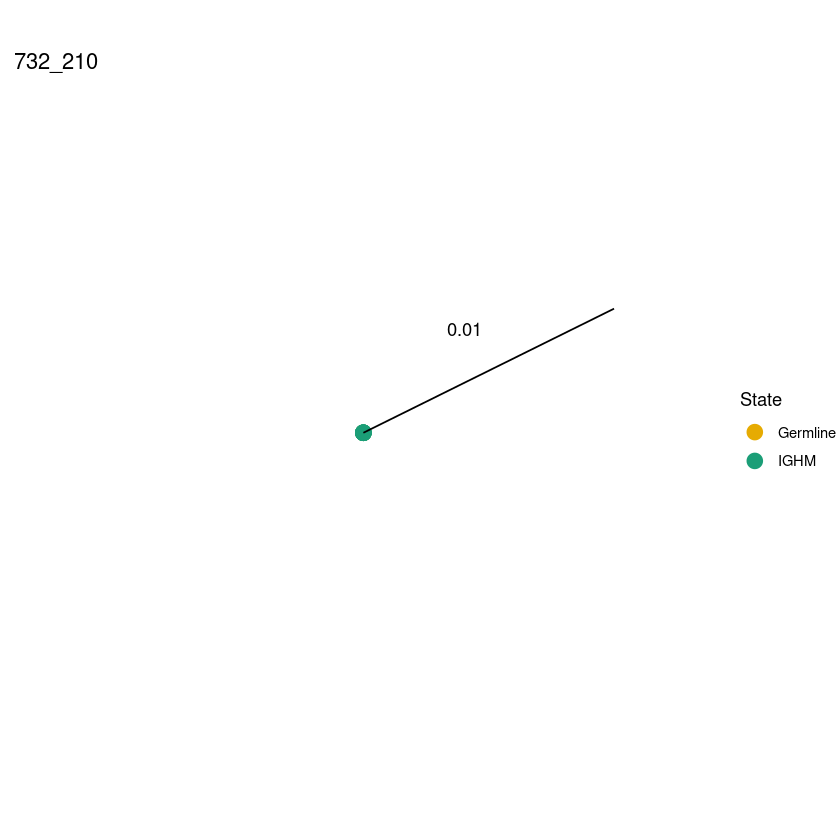

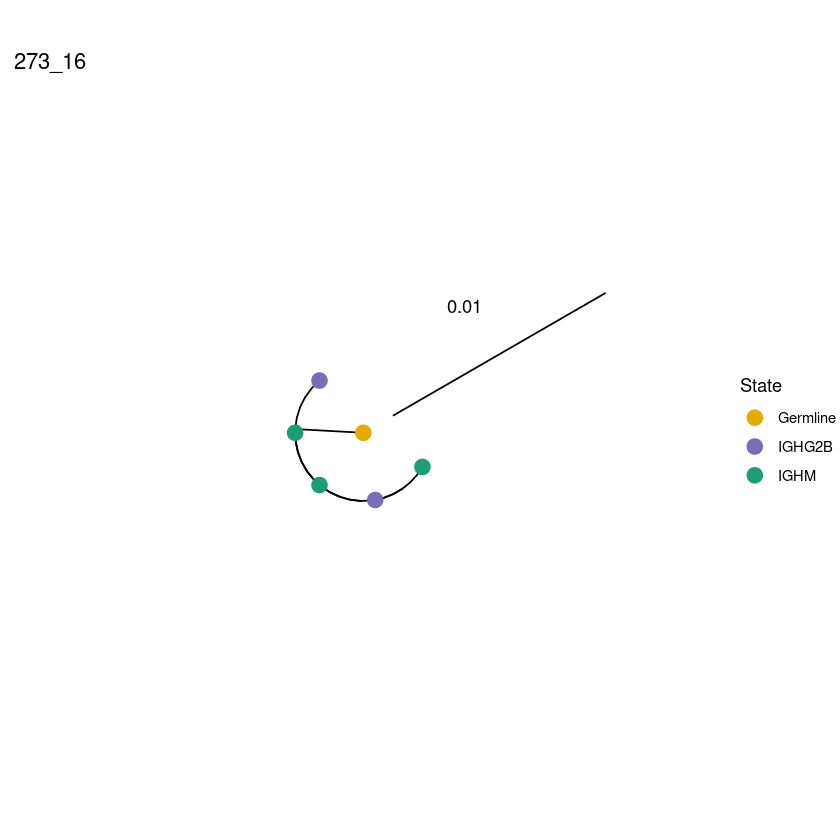

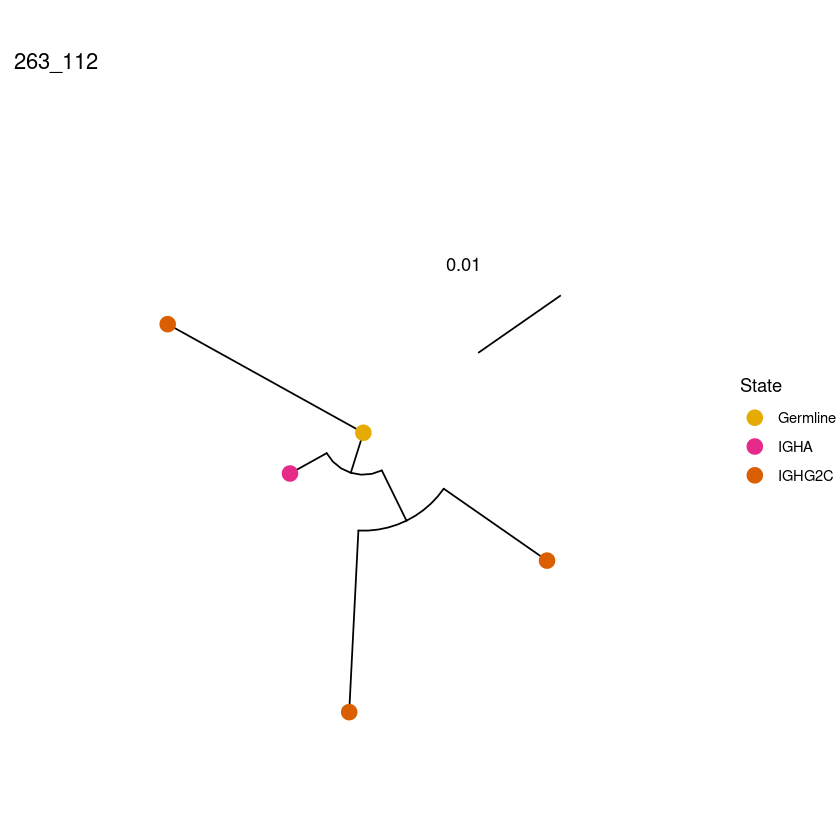

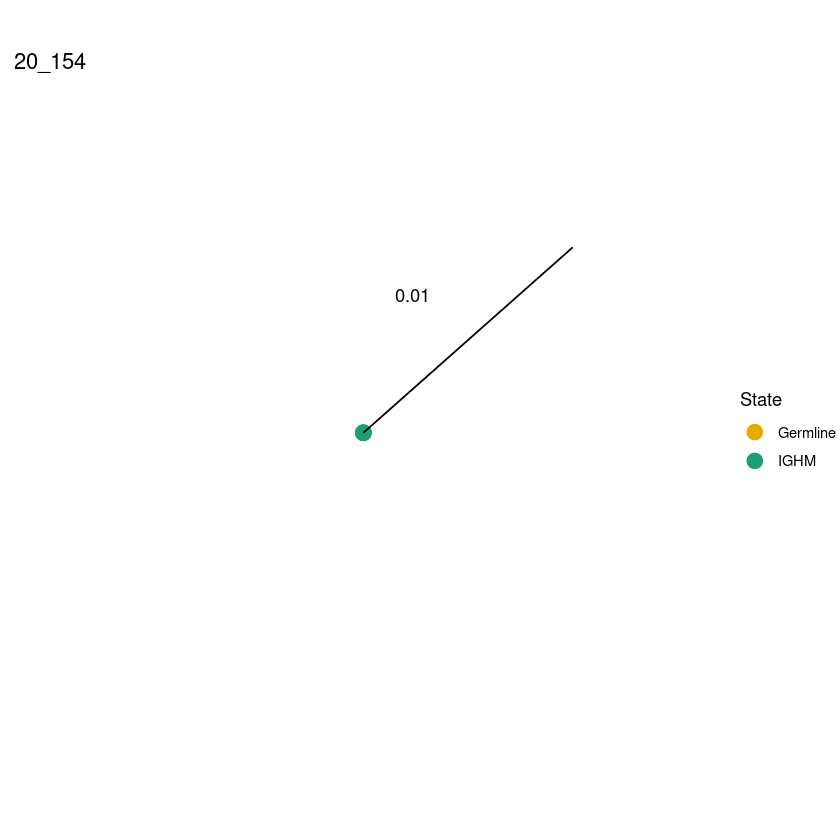

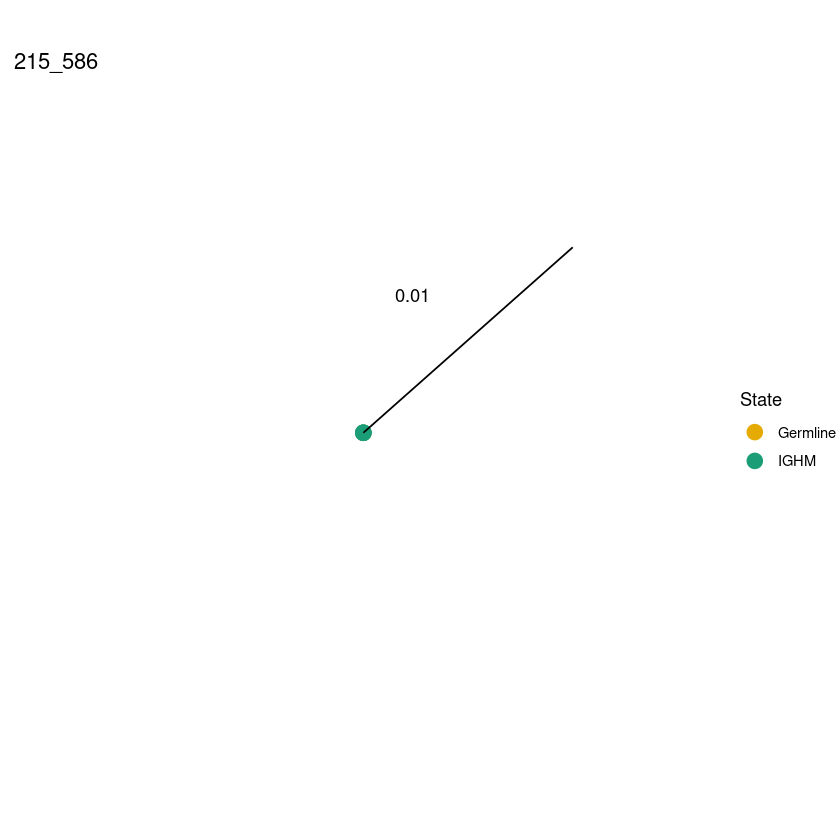

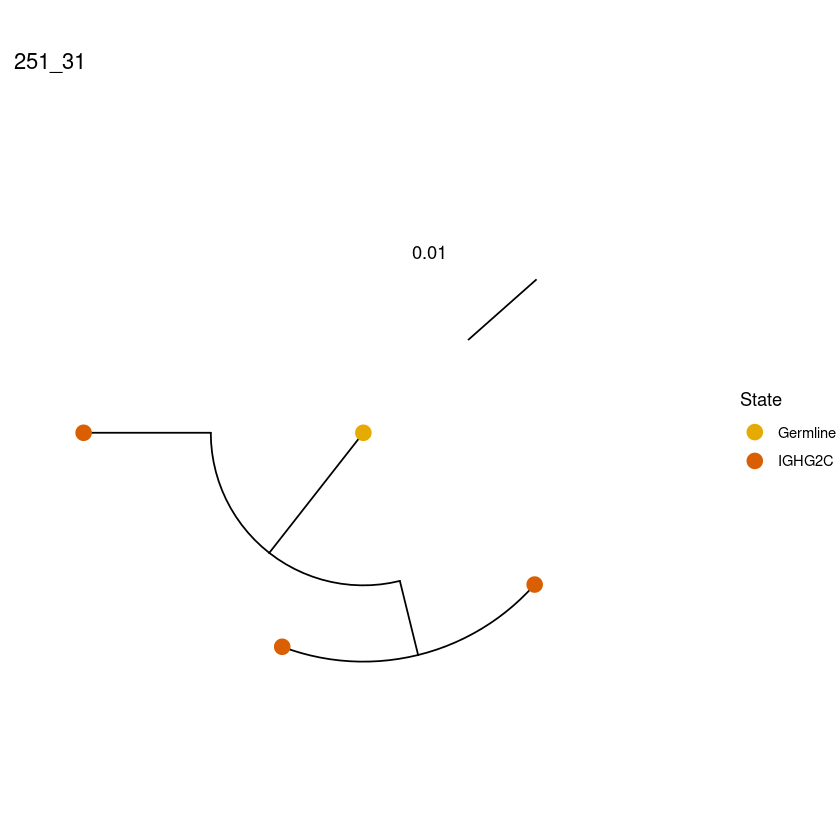

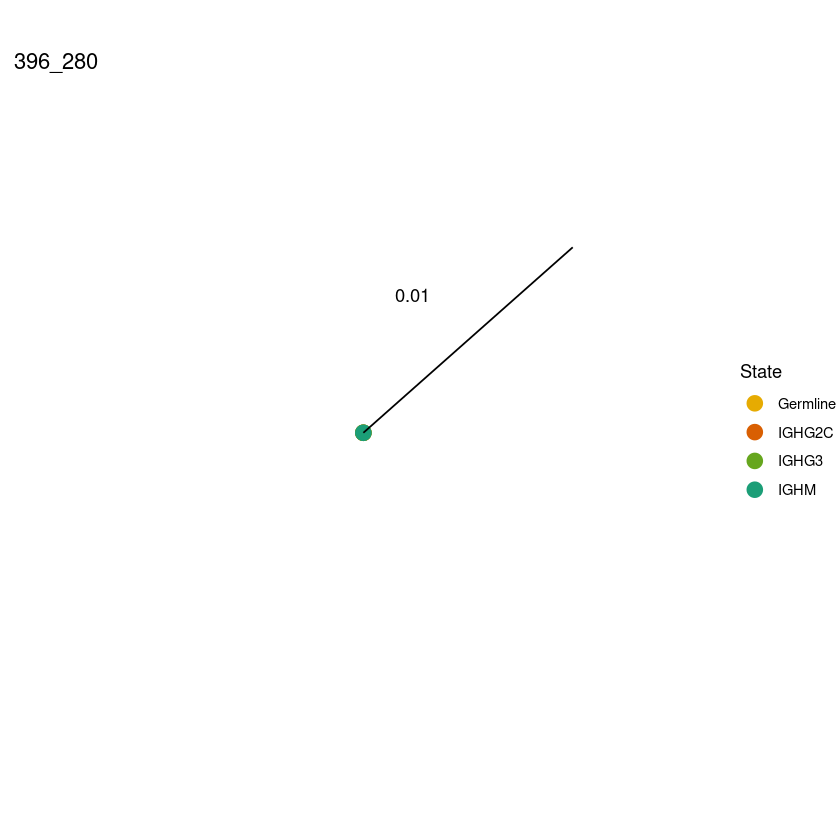

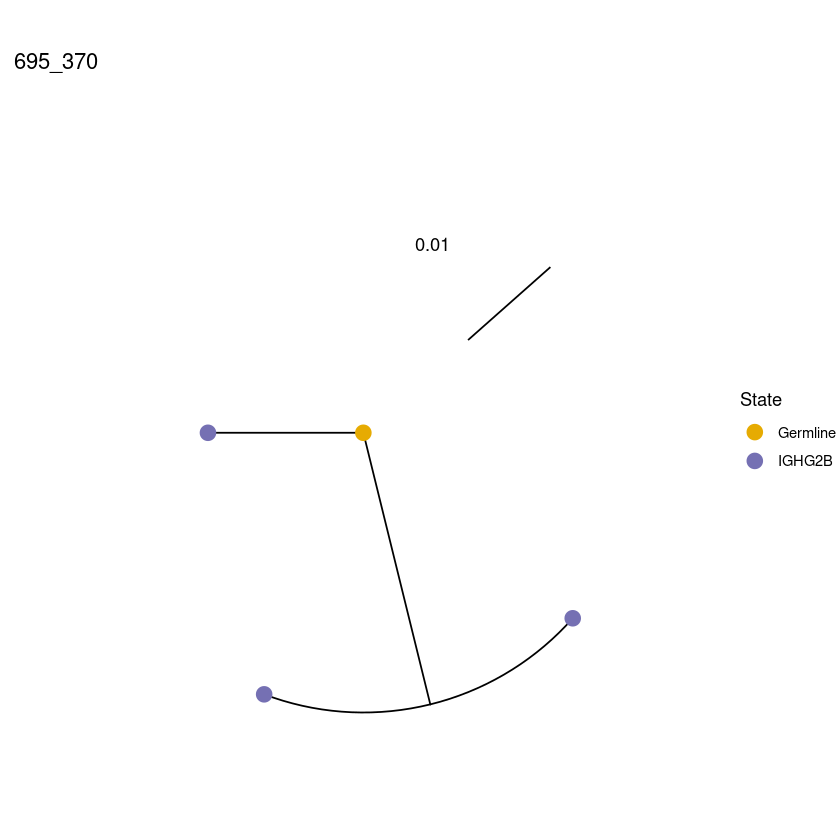

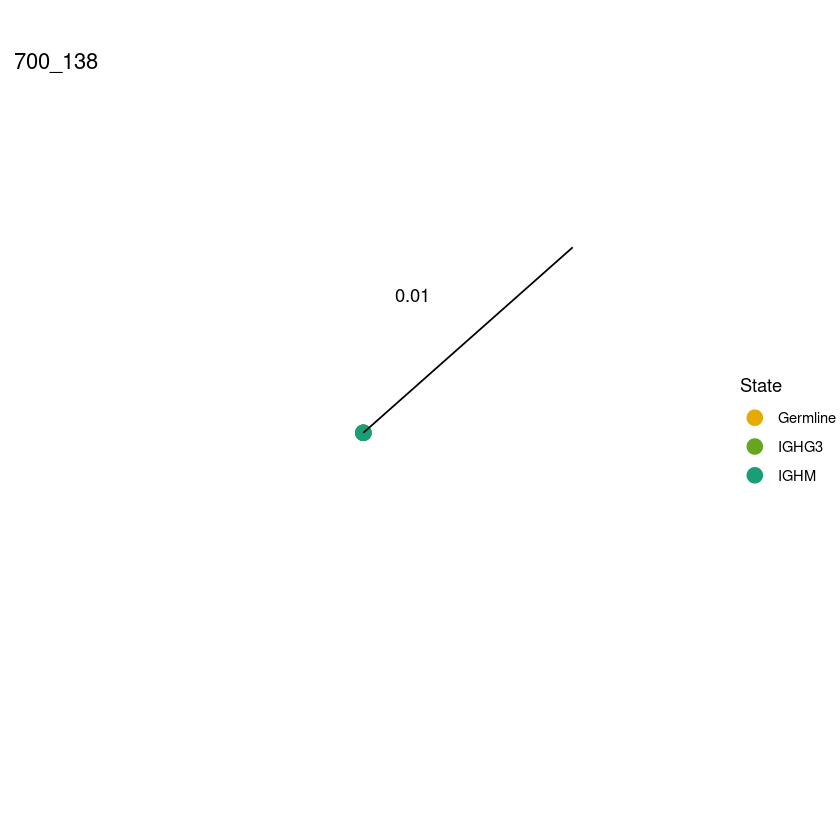

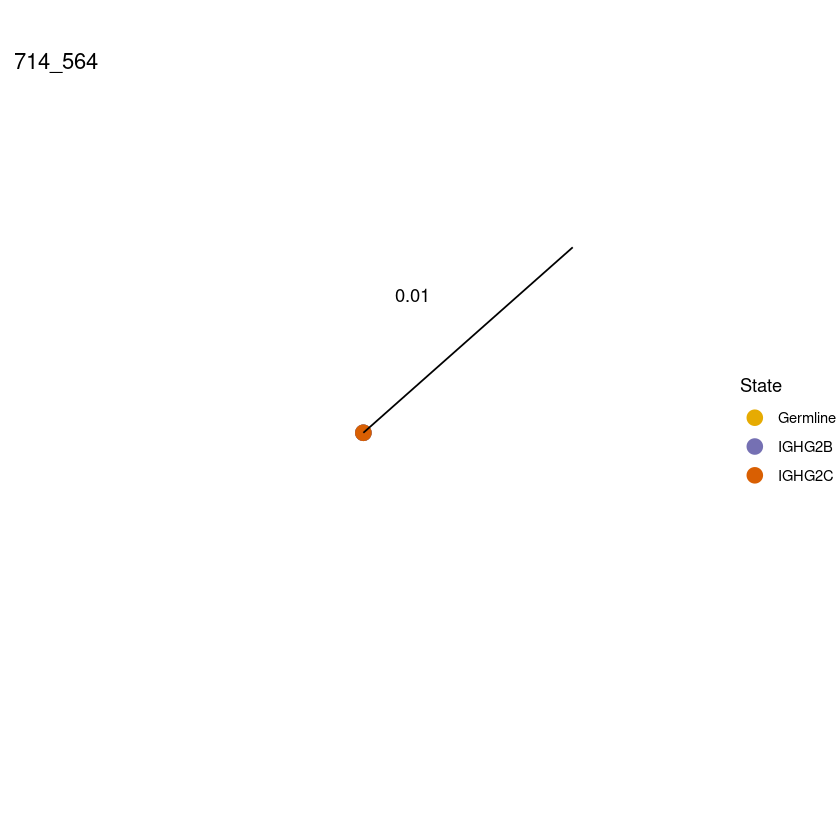

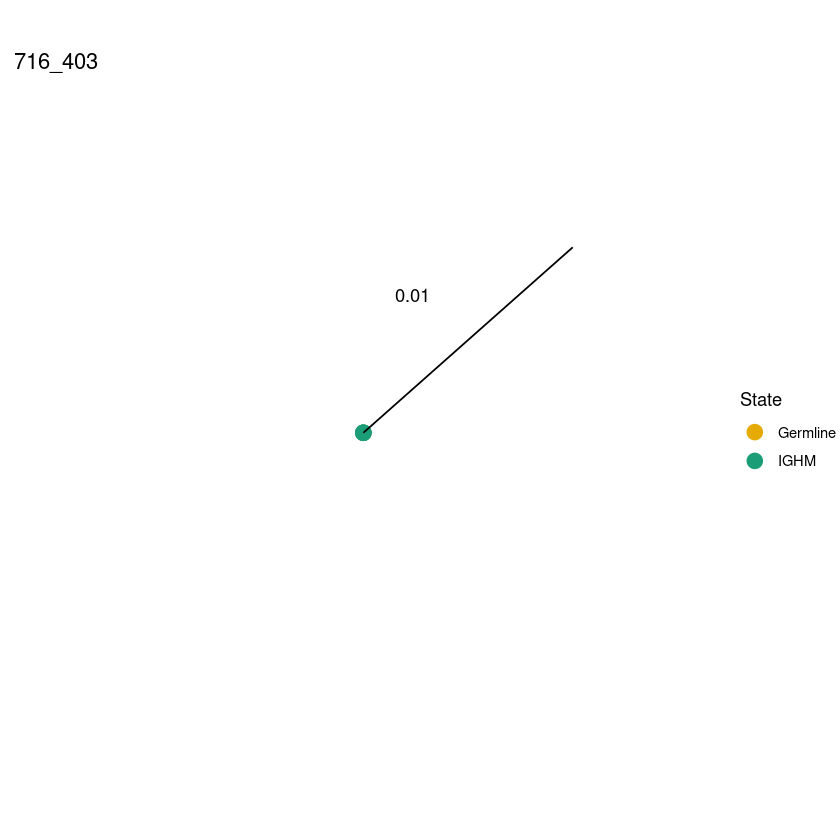

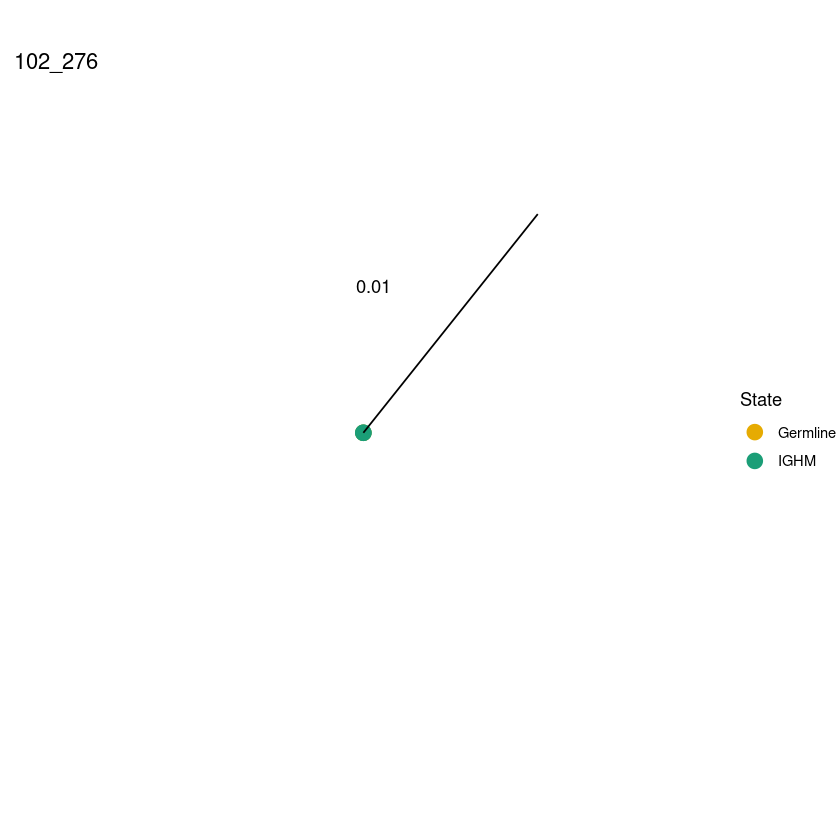

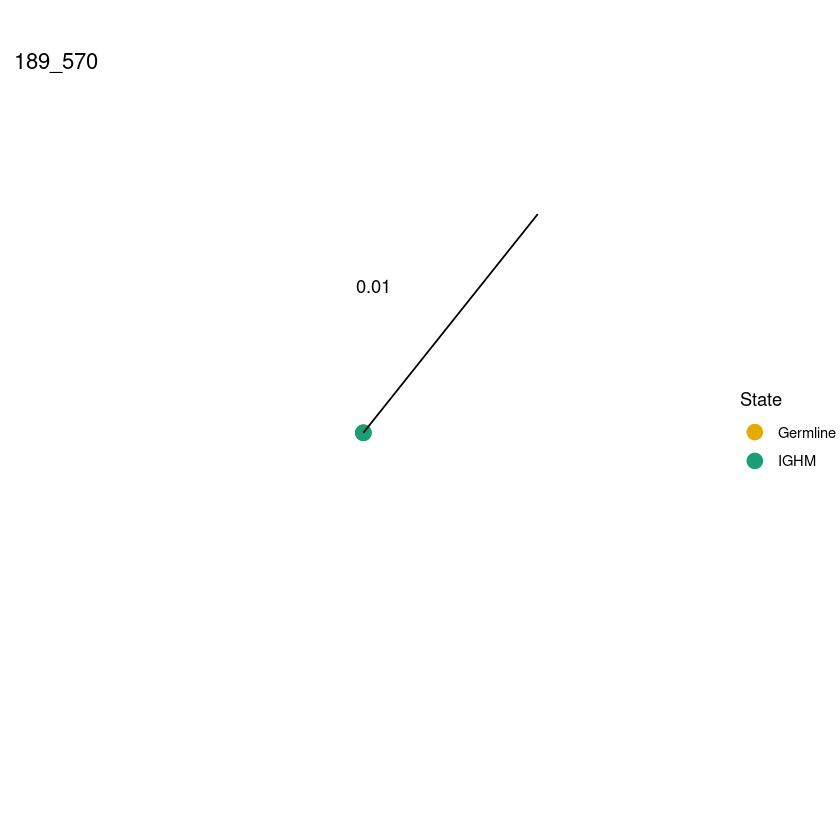

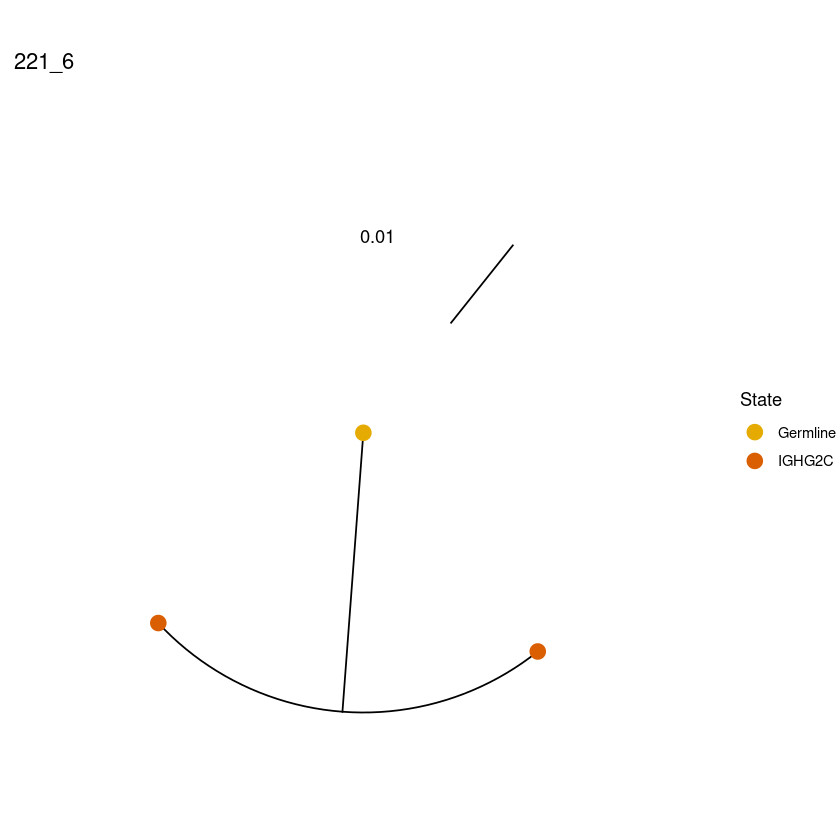

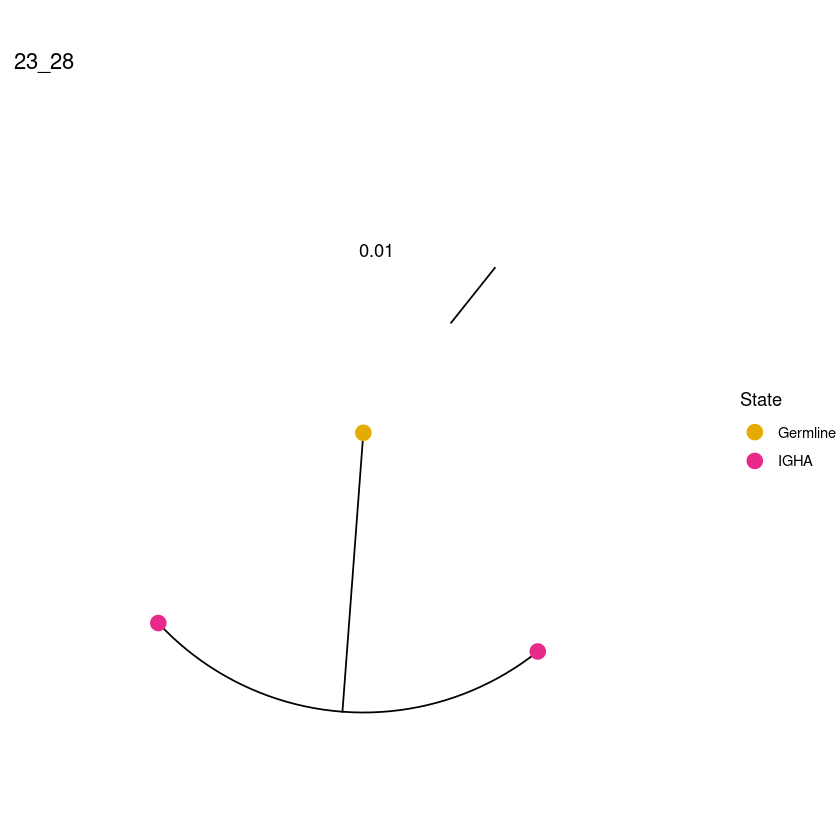

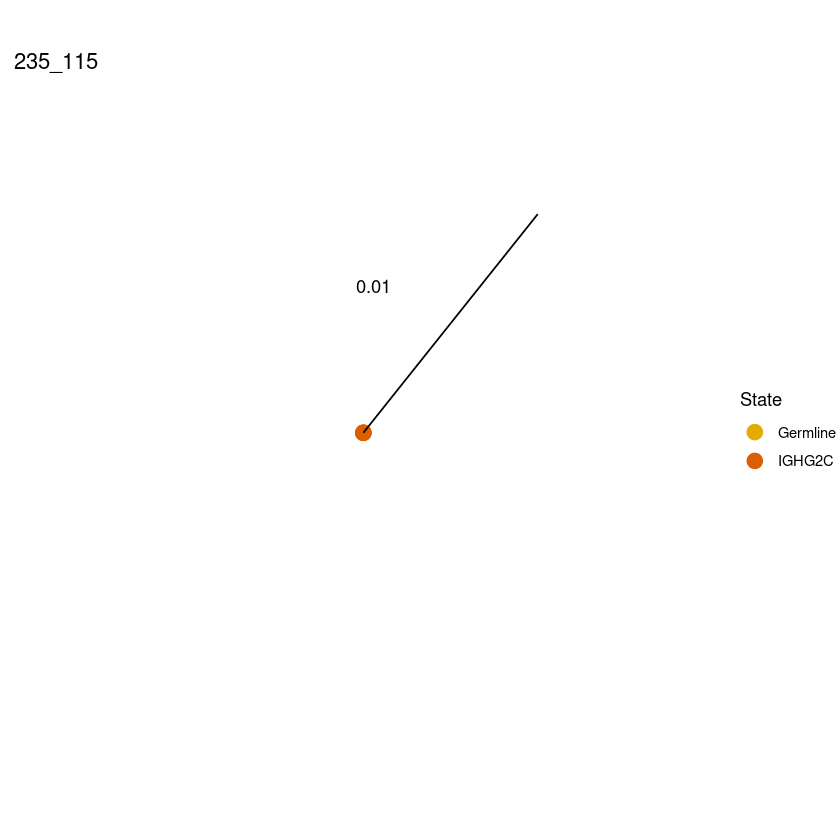

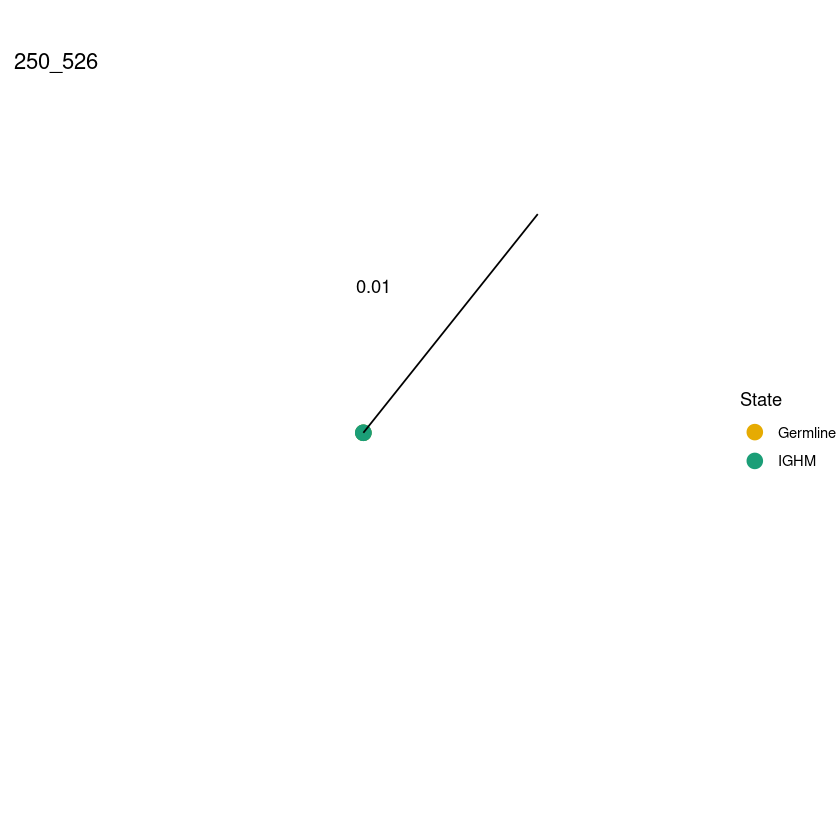

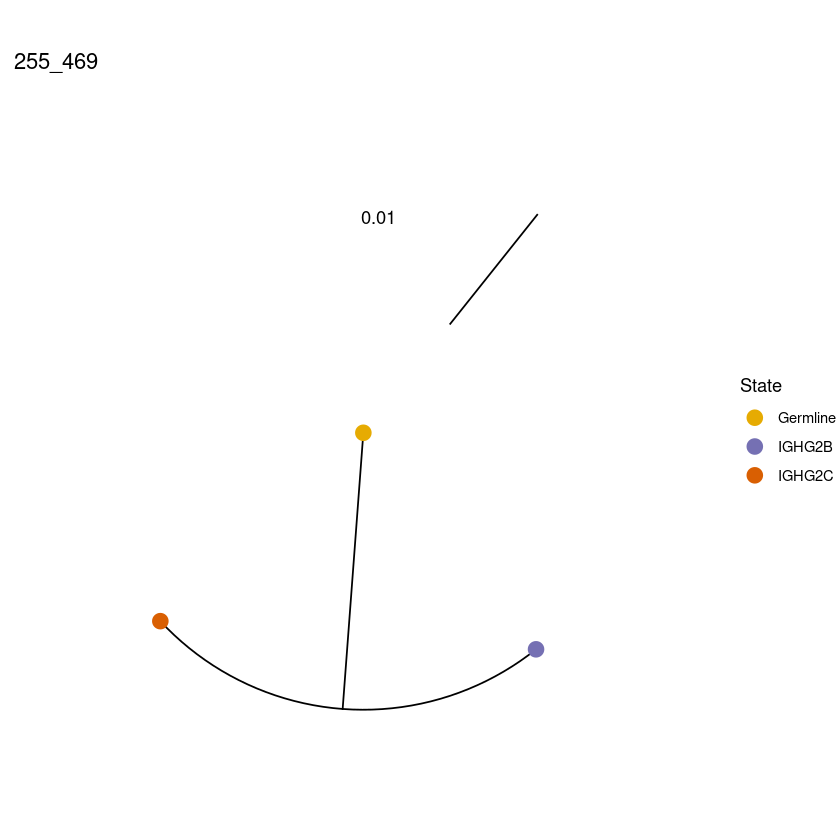

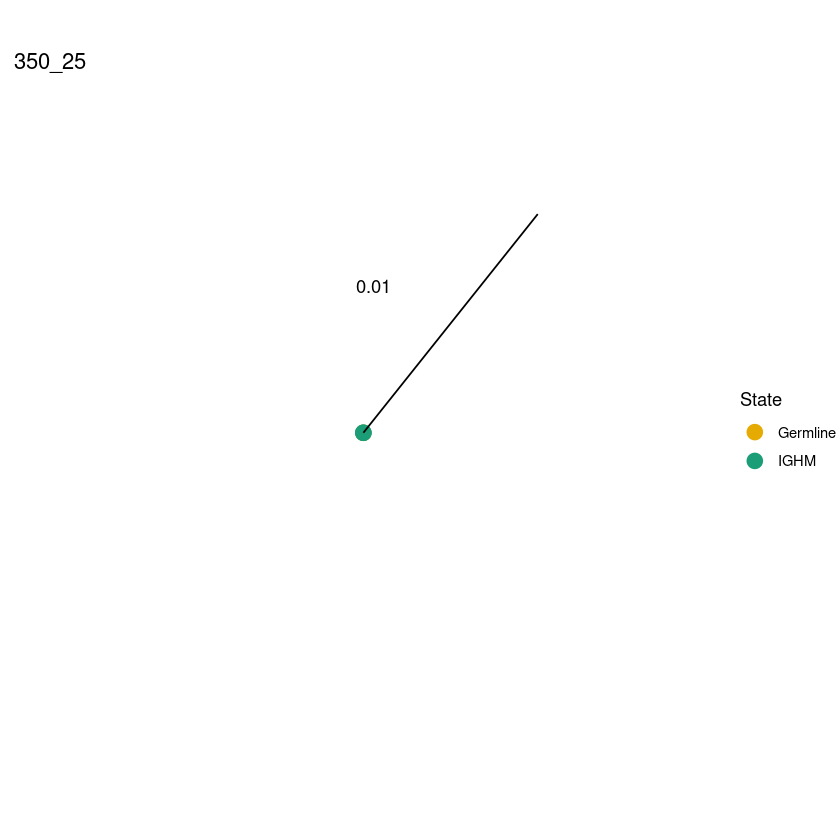

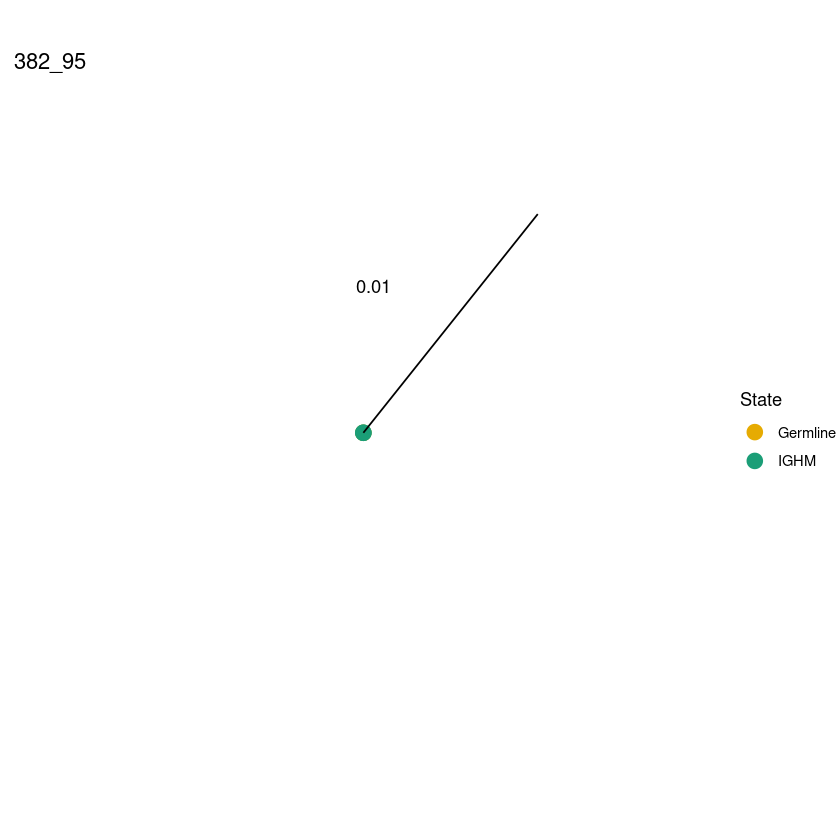

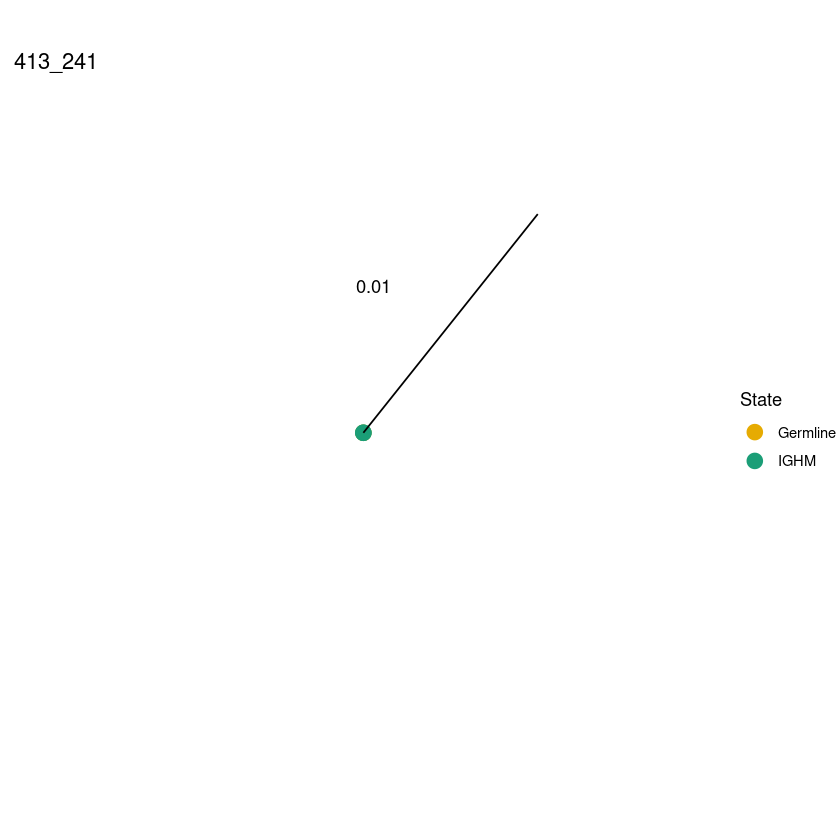

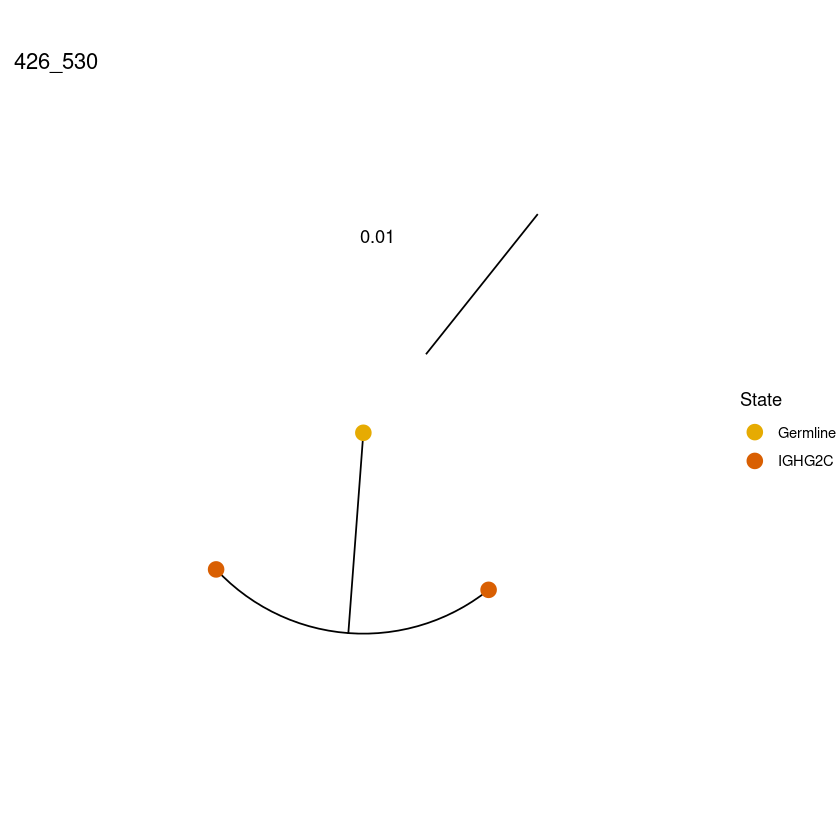

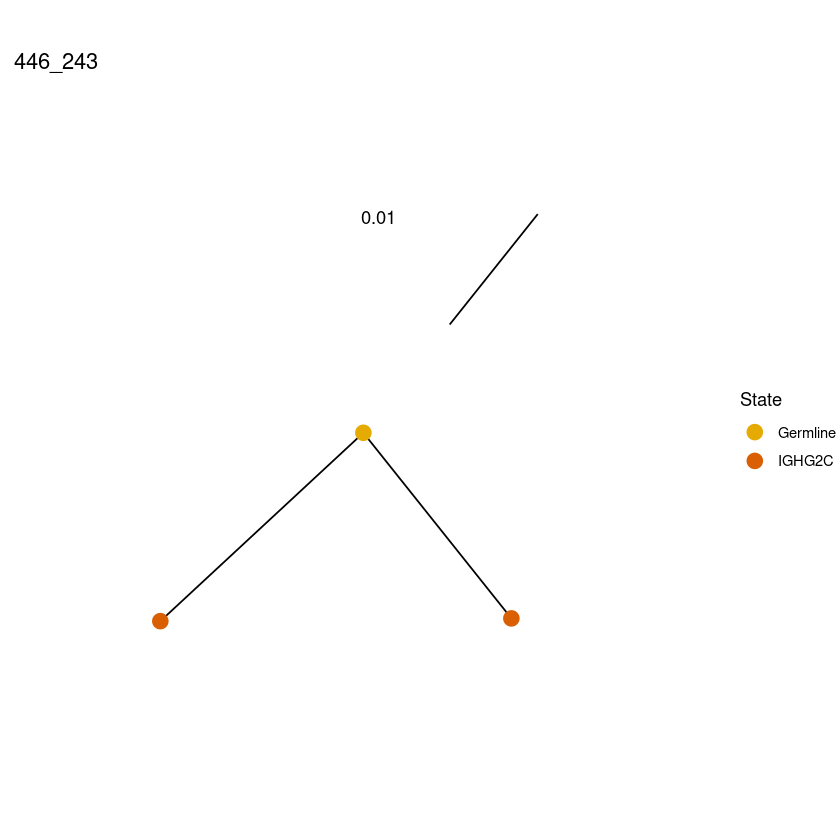

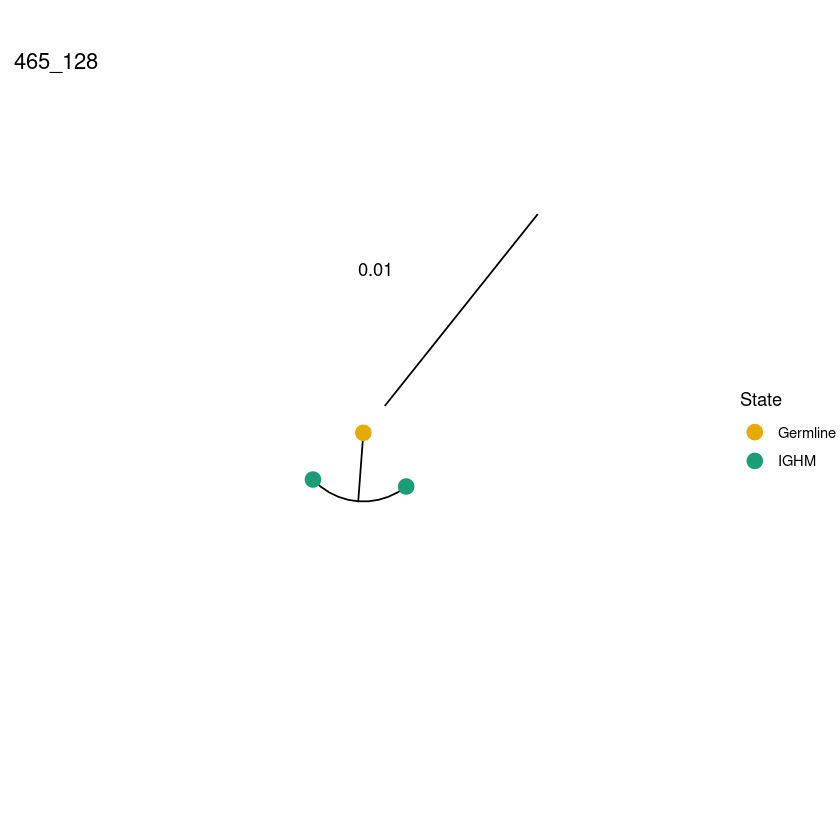

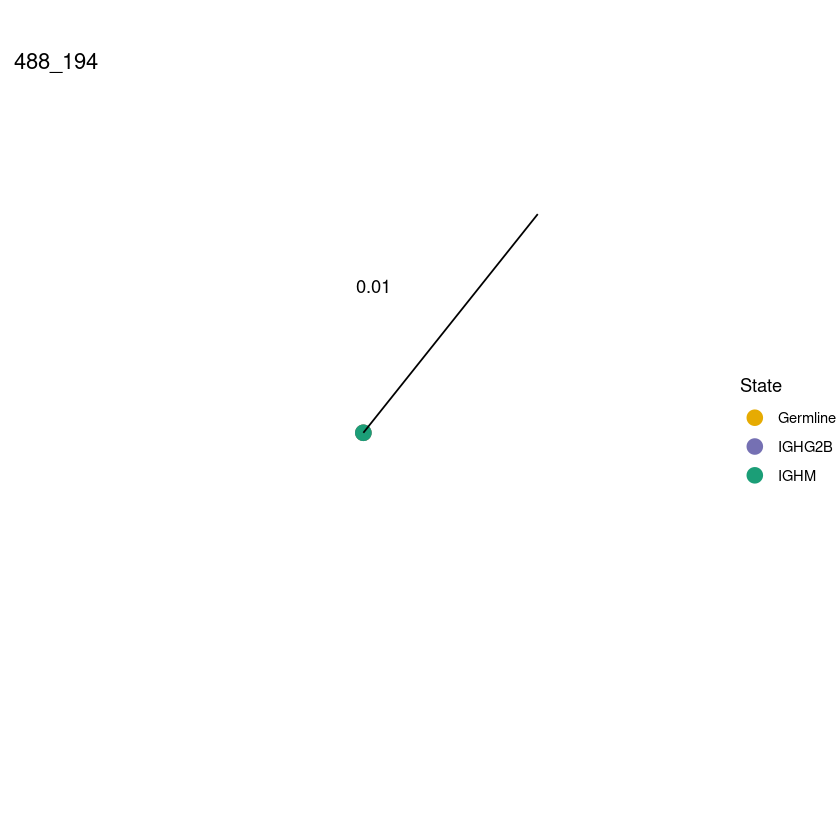

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]

[[22]]

[[23]]

[[24]]

[[25]]

[[26]]

[[27]]

[[28]]

[[29]]

[[30]]

[[31]]

[[32]]


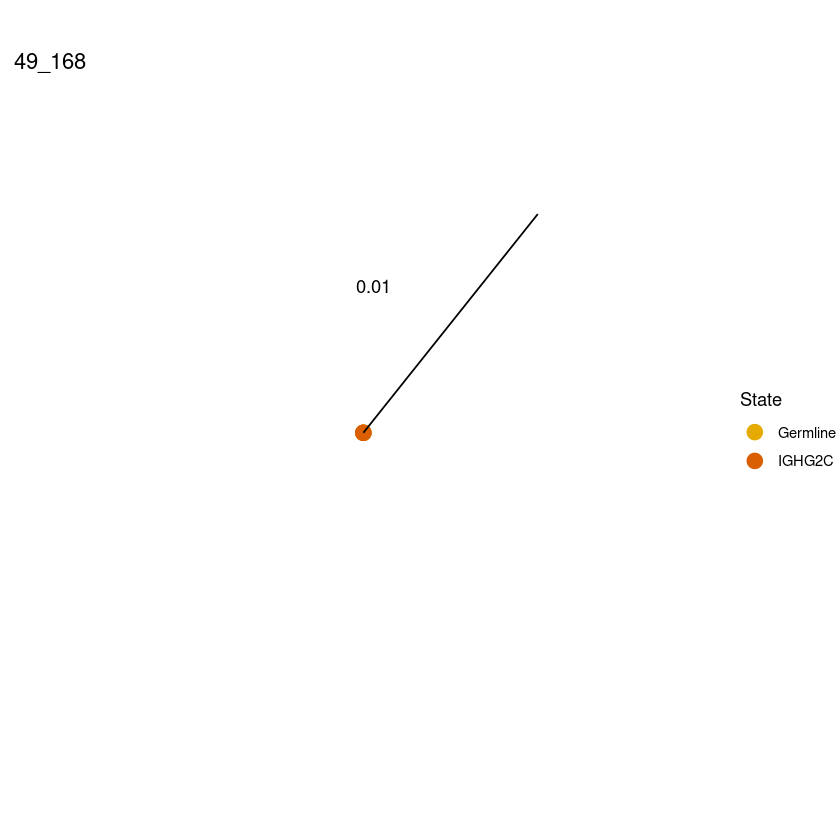

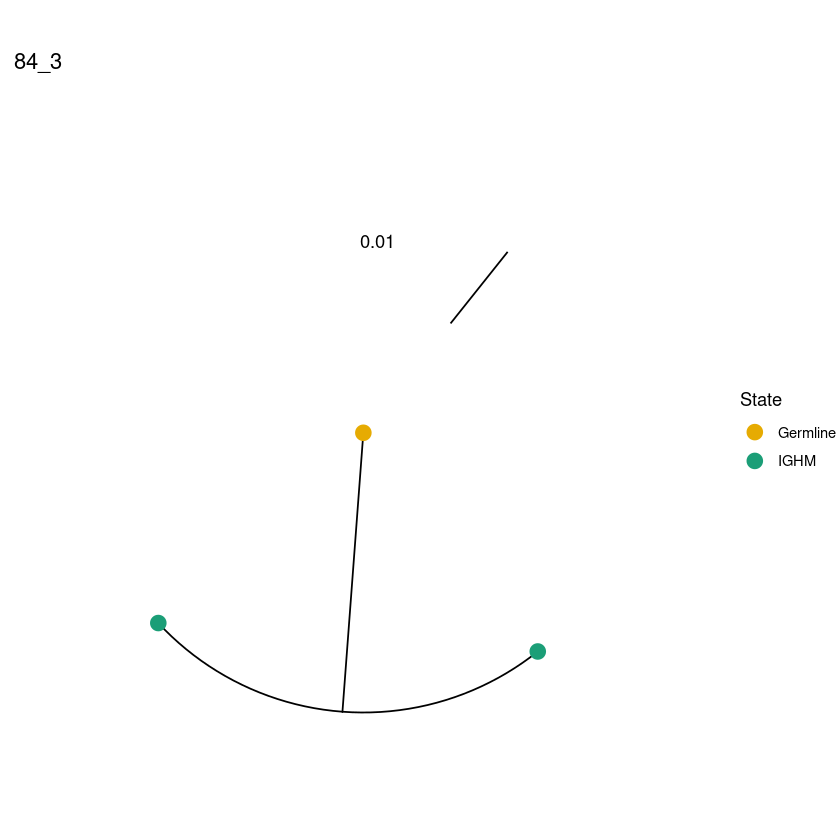

In [21]:
# simple tree plotting with ggtree R package with isotypes at tips
plotTrees(trees, nodes = FALSE, tips="c_call", tipsize = 4, node_palette = "Dark2", title = TRUE, layout = "circular")

$title
[1] "B cell tree"

attr(,"class")
[1] "labels"

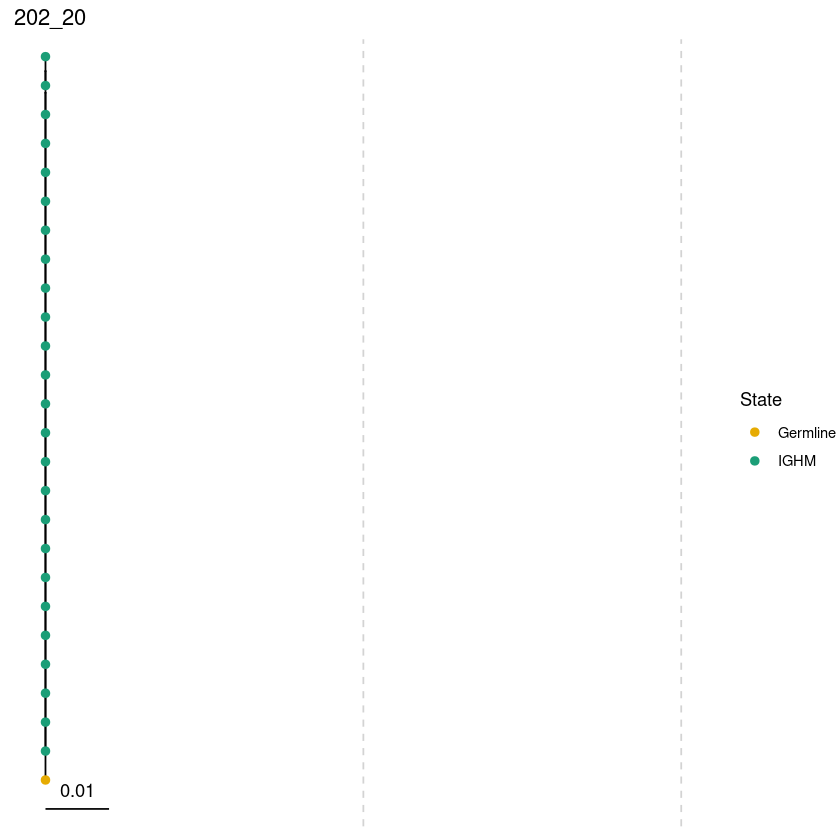

In [22]:
plots <- plotTrees(trees, tips="c_call", tipsize=2)

treeplot <- plots[[1]] + geom_vline(xintercept=c(0.05,0.1), 
           linetype="dashed",color="lightgrey")
ggtitle("B cell tree")

treeplot